# Exploratory Data Analysis (EDA): House Price Prediction

In [1]:
import pandas as pd

# Load the dataset

housing_data = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Check for missing values
missing_values = housing_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Get dataset info and summary statistics
housing_data.info()
housing_data.describe(include='all')

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 n

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [3]:
# Encode binary categorical variables
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_data[binary_columns] = housing_data[binary_columns].replace({'yes': 1, 'no': 0})

# Apply one-hot encoding for 'furnishingstatus'
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

# Display updated dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


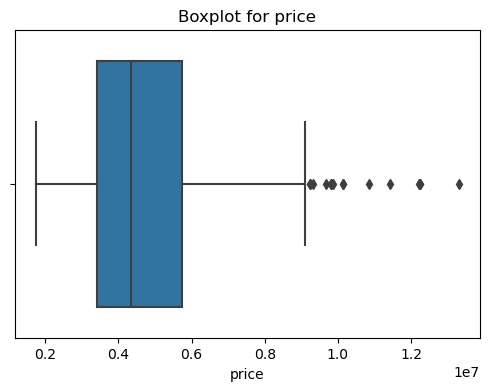

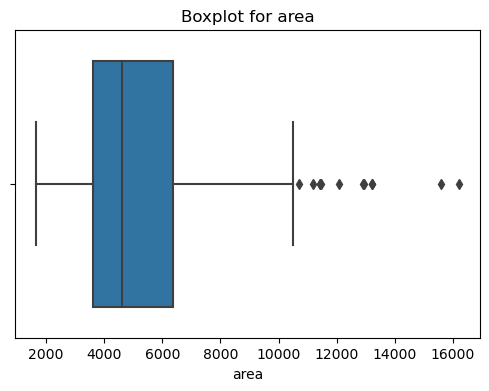

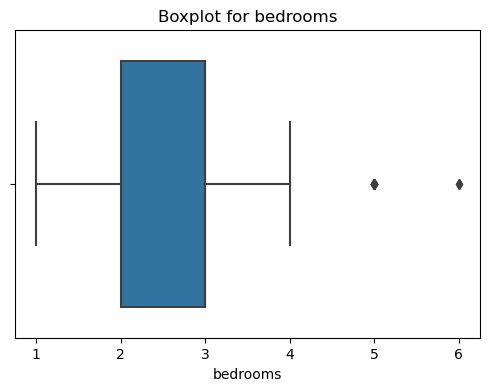

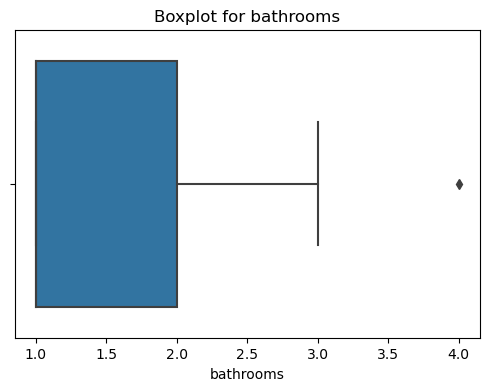

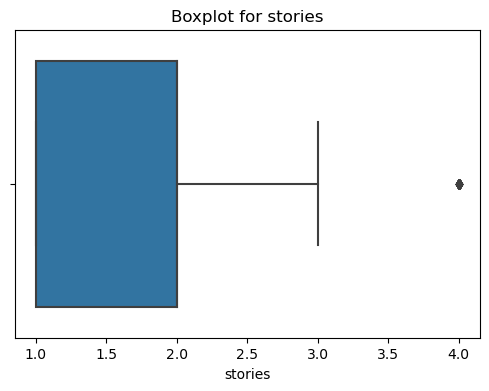

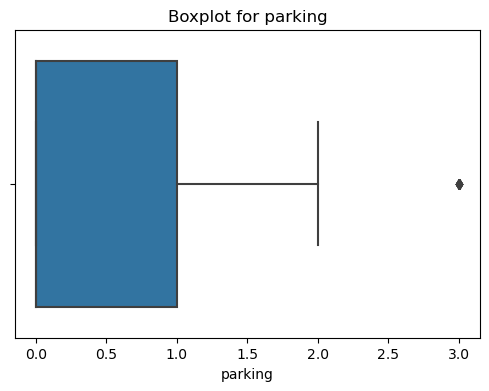

In [4]:
# Visual inspection of numerical features for outliers
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=housing_data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [5]:
# Remove extreme outliers in 'price' and 'area'
housing_data = housing_data[(housing_data['price'] < housing_data['price'].quantile(0.99)) &
                             (housing_data['area'] < housing_data['area'].quantile(0.99))]

# Confirm outliers removal
print("Dataset shape after removing outliers:", housing_data.shape)

Dataset shape after removing outliers: (533, 14)


In [6]:
# Display final dataset structure
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,True,False
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,False,True
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,True,False
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,True,False


## Step 1: Data Overview
Summarize the data and examine its structure, distributions, and potential anomalies.

In [7]:
import pandas as pd

# Load the dataset

housing_data = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
# Basic dataset information
housing_data.info()

# Summary statistics
housing_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


### Observations:
- The dataset contains numerical and categorical variables.
- No missing values were detected during data wrangling.
- Statistical and visual analysis of the target (`price`) and features will provide deeper insights.

## Step 2: Univariate Analysis
Examine the distributions of key numerical and categorical variables.

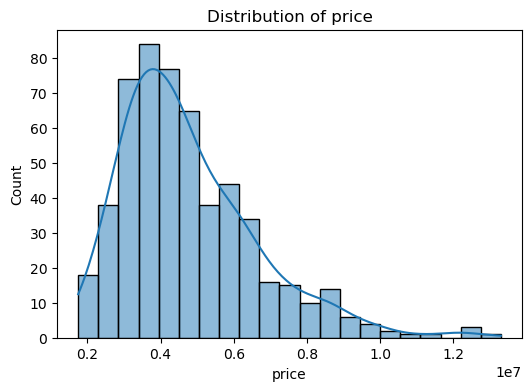

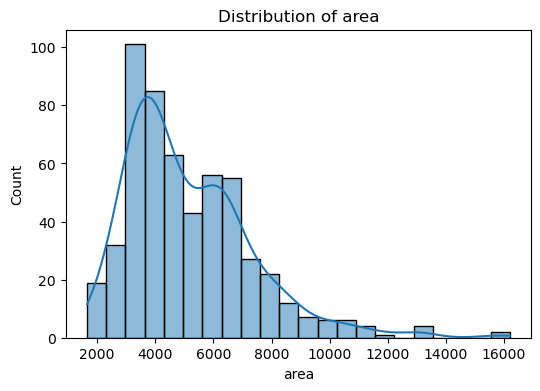

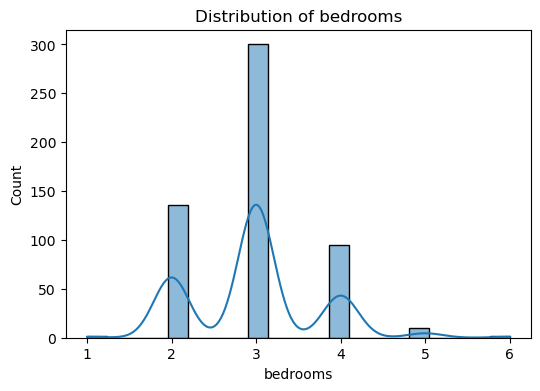

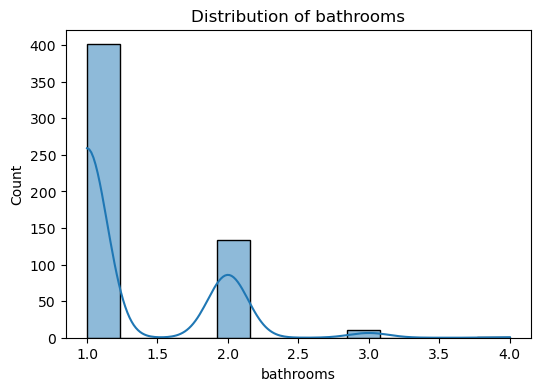

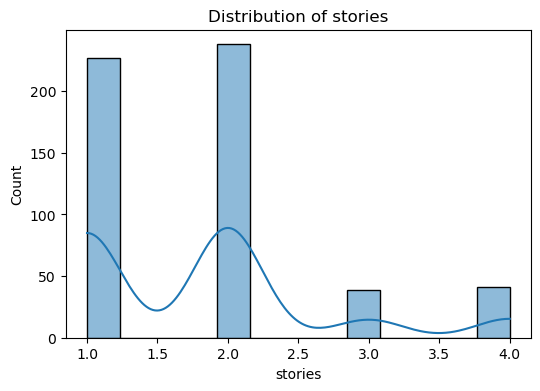

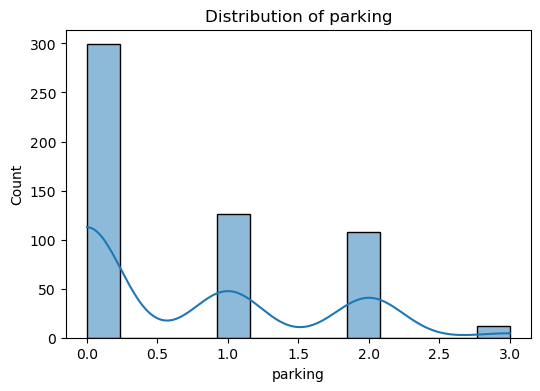

In [9]:
# Visualize the distribution of numerical variables
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(housing_data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

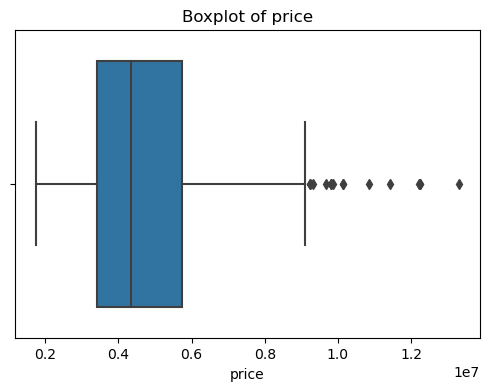

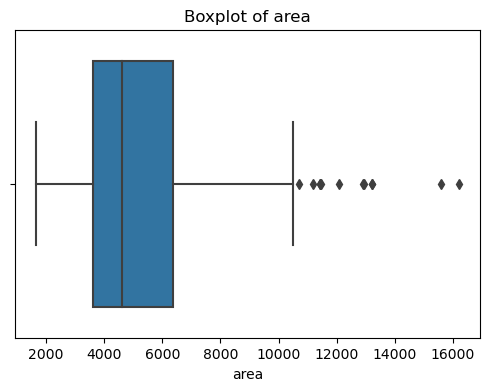

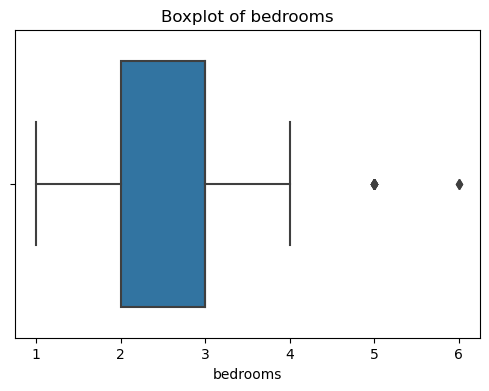

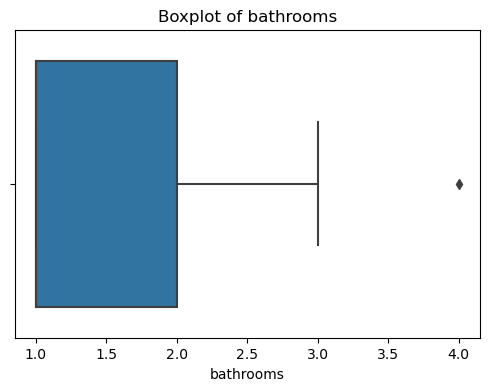

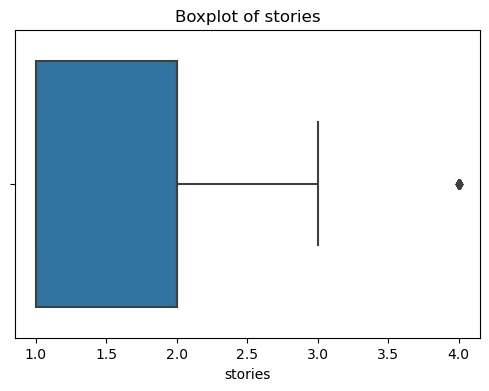

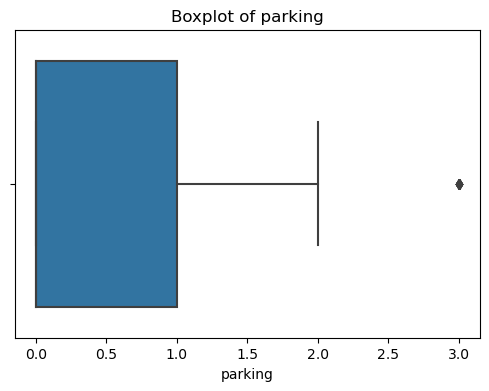

In [10]:
# Boxplots to detect outliers in numerical variables
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=housing_data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

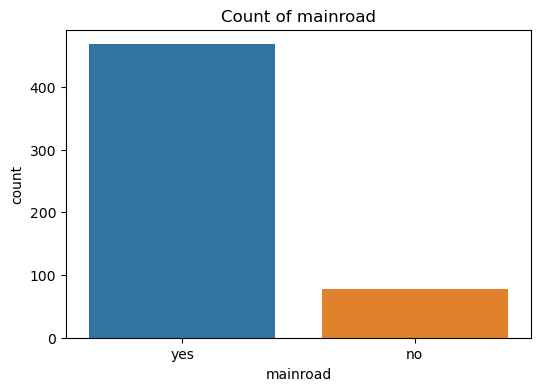

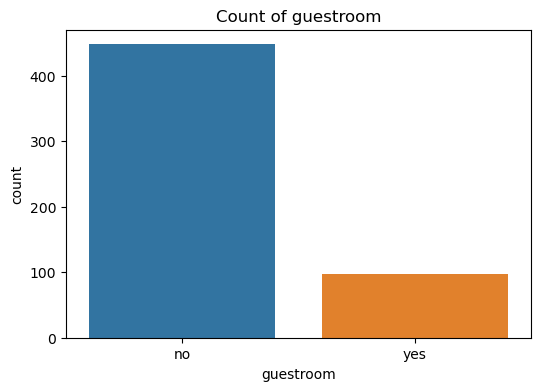

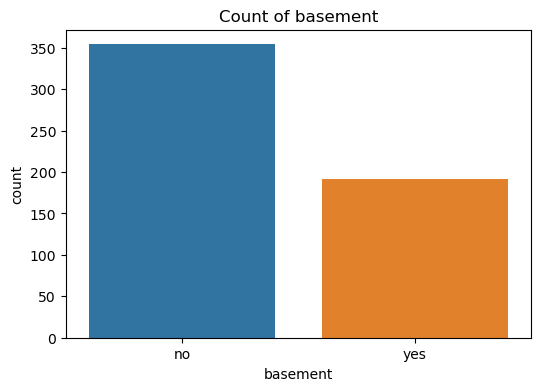

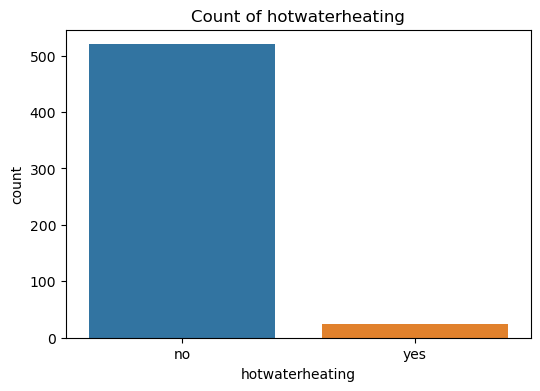

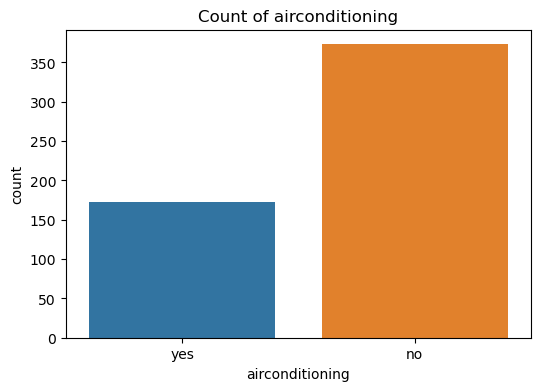

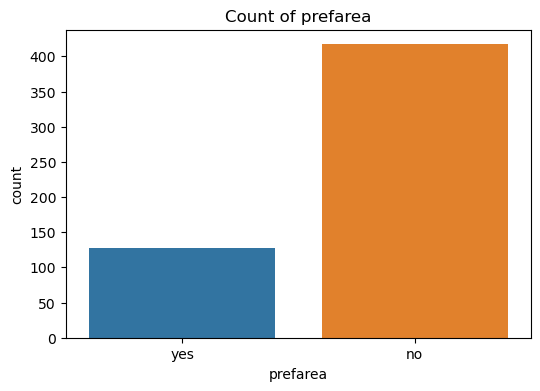

In [11]:
# Bar plots for categorical variables
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=housing_data[column])
    plt.title(f"Count of {column}")
    plt.show()

## Step 3: Bivariate Analysis
Analyze relationships between features and the target variable (`price`).

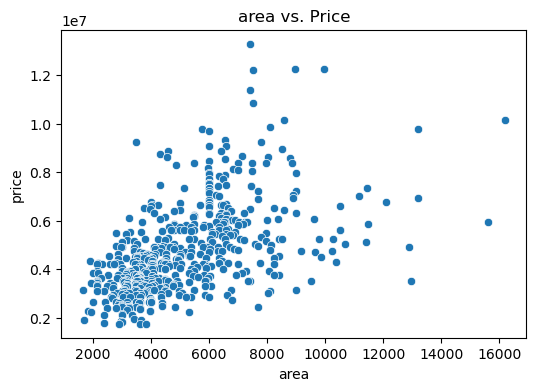

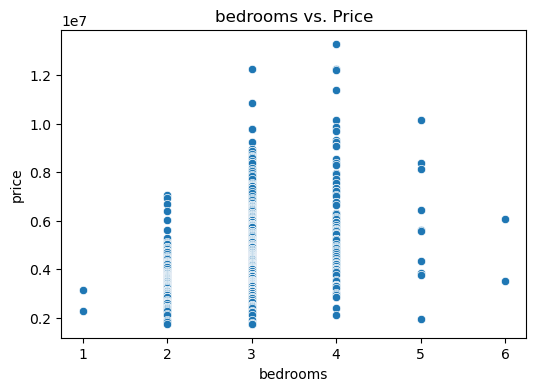

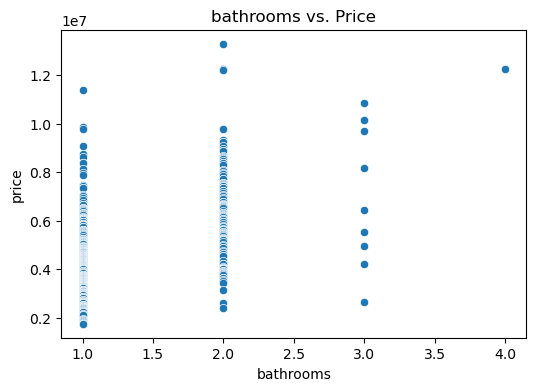

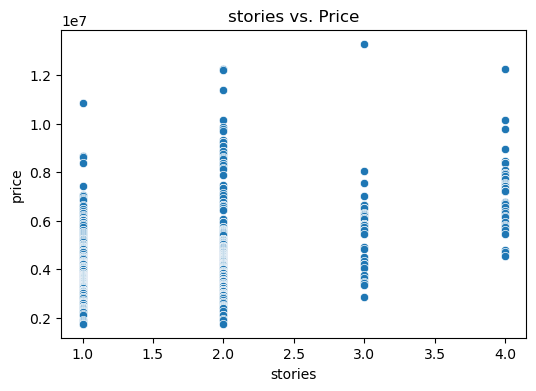

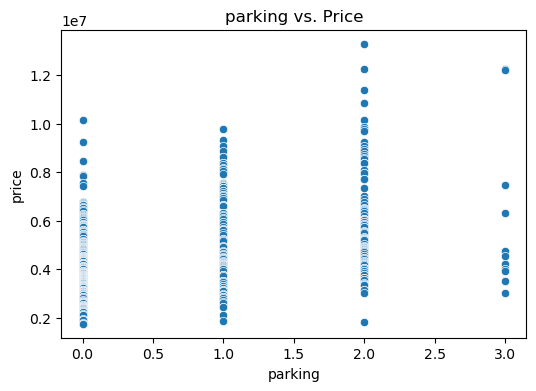

In [12]:
# Scatter plots to analyze relationships with 'price'
for column in numerical_columns:
    if column != 'price':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=housing_data[column], y=housing_data['price'])
        plt.title(f"{column} vs. Price")
        plt.show()

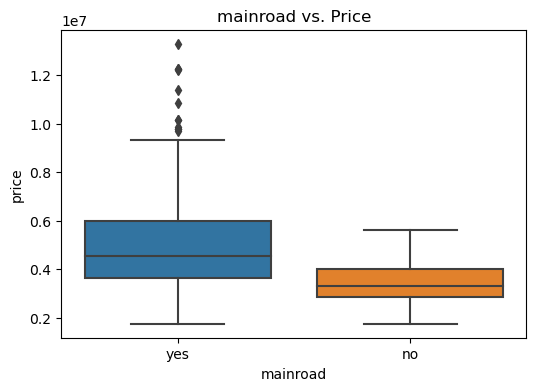

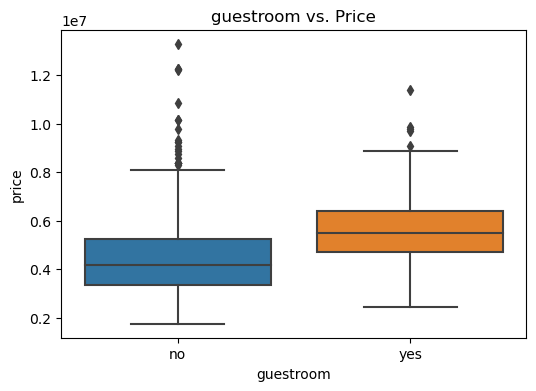

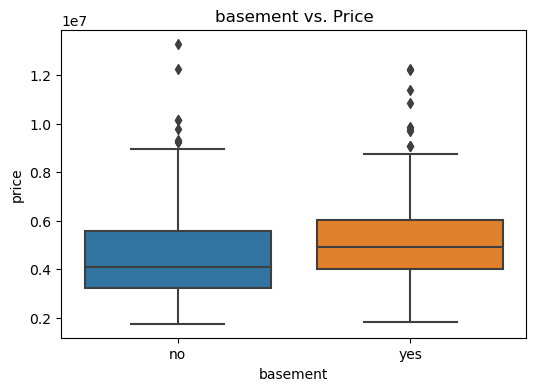

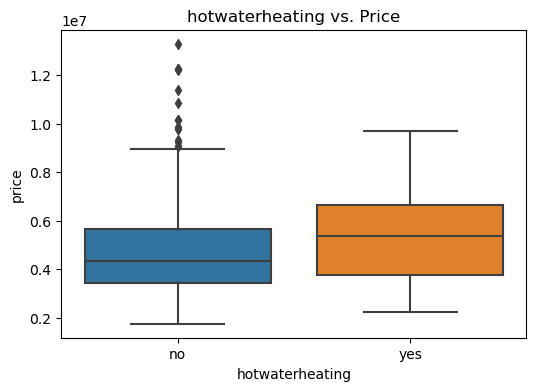

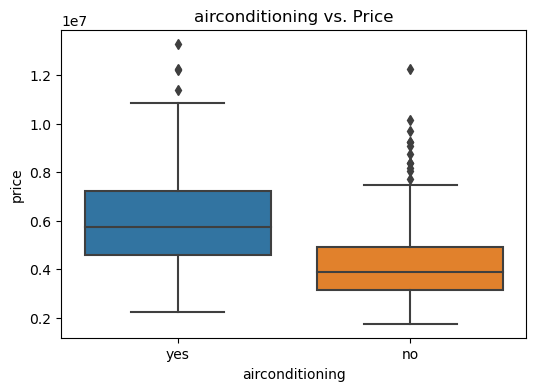

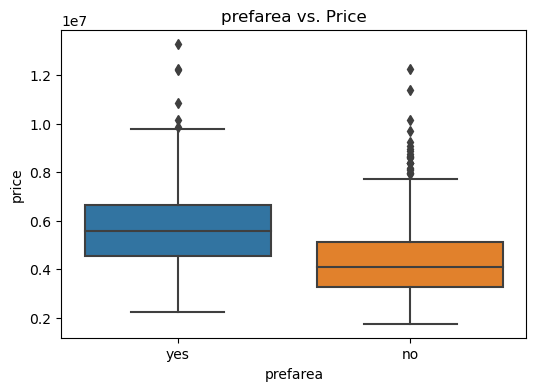

In [13]:
# Boxplots for categorical variables vs. 'price'
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=housing_data[column], y=housing_data['price'])
    plt.title(f"{column} vs. Price")
    plt.show()

## Step 4: Correlation Analysis
Examine correlations among numerical features and identify highly correlated pairs.

In [15]:
housing_data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

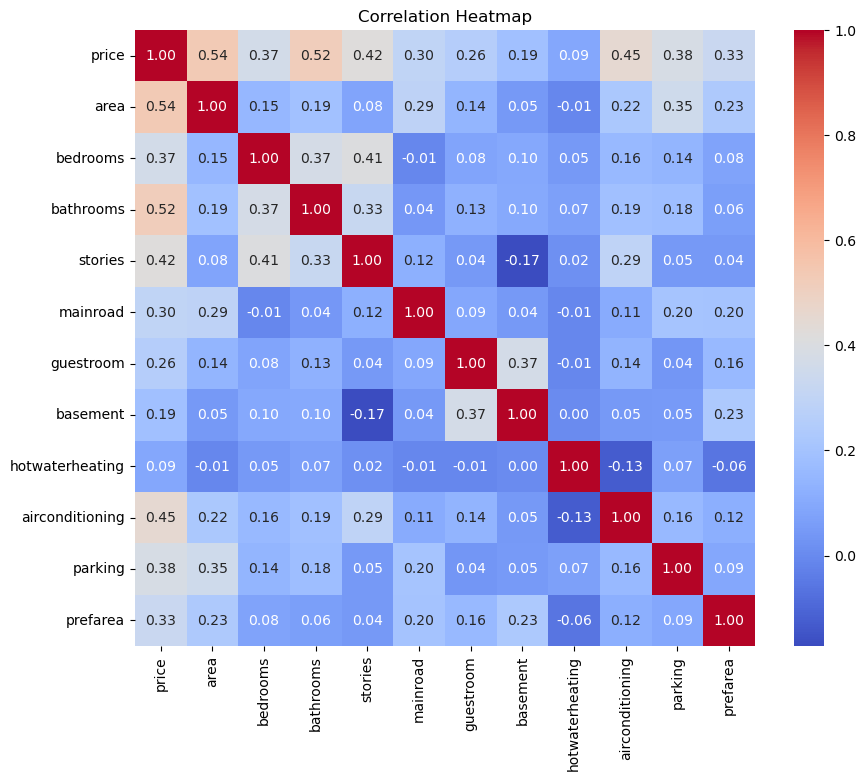

In [16]:
# Convert binary categorical variables to numeric (1/0)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_data[binary_columns] = housing_data[binary_columns].replace({'yes': 1, 'no': 0})

# One-hot encode 'furnishingstatus'
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

# Compute correlation matrix for numeric columns only
numeric_data = housing_data.select_dtypes(include=['number'])  # Select numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:
- Strong correlations will indicate key predictors for the target variable (`price`).
- Multi-collinearity among independent variables will be considered in feature selection.

## Step 5: Feature Selection and Engineering
Identify important features and create new ones if necessary.

In [17]:
# Feature selection using correlation threshold
important_features = correlation_matrix['price'].sort_values(ascending=False)
print("Features most correlated with price:")
print(important_features)

Features most correlated with price:
price              1.000000
area               0.535997
bathrooms          0.517545
airconditioning    0.452954
stories            0.420712
parking            0.384394
bedrooms           0.366494
prefarea           0.329777
mainroad           0.296898
guestroom          0.255517
basement           0.187057
hotwaterheating    0.093073
Name: price, dtype: float64


### Conclusion
The EDA process revealed:
- Key features influencing house prices.
- Relationships between variables.
- Insights into potential feature engineering and selection for model building.